#### This program aims to recreate the plots and diagrams in Section 3.3 of Physics by Computer by Kinzel and Reents.

## 3.3 Fractal Lattices

Spatial dimension D of an object can be determined from the relation between the number of its components that make up its mass M and its linear dimension L

$$M \propto L^D$$

Comparing the masses of two cubes with sides L and 2L

$$\frac{M_2}{M_1}\ =\ \Big(\frac{2L}{L}\Big)^D\ =\ 2^D$$

$$D\ =\ \lim_{L \to \infty} \frac{log\ M}{log\ L}$$

Another way to determine the dimension D is by covering the object with small cubes whose edges have length $\epsilon$. Let $N(\epsilon)$ be the smallest number of these cubes needed. Then

$$N(\epsilon)\ \propto\ \epsilon^{-D}$$

$$D\ =\ -\lim_{\epsilon \to\ 0} \frac{log\ N(\epsilon)}{log\ \epsilon}$$

To determine the length of a border on a map, for example, we can take a small ruler of length $\epsilon$ and determine the number $N(\epsilon)$ of steps we need to measure the borderline. Then

$$L\ =\ \epsilon N(\epsilon)$$

to be a measure of that length. A smaller ruler $\epsilon$ apparently requires more steps than $L/\epsilon$ to cover the border, therefore D cannot be equal to 1. 

A border is a fractal with $1\ <\ D\ <\ 2$; therefore $L \propto \epsilon^{1-D}$, a length that seems to diverge as $\epsilon \to 0$. 

Another example wherein the fractal dimension D does not agree with the embedding dimension d, dimension of space in which the object is located, is a random motion (random walk) in d-dimensional space. This is also discussed as a simple model of a polymer molecule that consists of a large number of monomers. Assume that the distance between adjacent monomers is constant, but the angles between three consecutive monomers are independent and randomly distributed. Denote the vectors connecting adjacent monomers as $\textbf{r_i}$. If $\langle ... \rangle$ is the average over many molecular configurations, we have

$$\langle \textbf{r}_i \rangle = 0, \quad \langle \textbf{r}_i \cdot \textbf{r}_j \rangle = \langle \textbf{r}_i \rangle \cdot \langle \textbf{r}_j \rangle = 0, \quad and\ \langle \textbf{r}_i^2 \rangle = a^2$$

where a is the distace between adjacent monomers. For the vector R between the beginning and end of a molecule conisting of N+1 monomers, we have 

$$\textbf{R}\ =\ \sum_{i=1}^{N} \textbf{r}_i$$

$$\langle \textbf{R} \rangle = \sum_{i=1}^{N} \langle \textbf{r}_i \rangle = 0$$

$$\langle \textbf{R}^2 \rangle = \sum_{i=1}^{N} \sum_{i=j}^{N} \langle \textbf{r}_i \cdot \textbf{r}_j \rangle = Na^2$$

Since the mass M is proportional to the number N of monomers and the linear dimension L is proportional to $\sqrt{\langle \textbf{R}^2 \rangle}$, we get

$$M \propto L^2$$

Then, from our very first relation, $D = 2$. Therefore, this random walk is always a 2D object, independent of the dimension d of the generation space. 

In [1]:
from numpy import sqrt,min,array,sort
from numpy.random import randint
from matplotlib.pyplot import plot,xlabel,ylabel,show,scatter

We use the algorithm of the game of dice to generate a fractal:
1. Select three points $\textbf{p}_1$, $\textbf{p}_2$, and $\textbf{p}_3$, and a starting point $\textbf{q}_o$
2. From point $\textbf{q}_n$, get the next point $\textbf{q}_{n+1}$ by randomly picking one of the three points $\textbf{p}_i$, then determine their midpoint.
3. Iterate ad infinitum.

In [12]:
x_vals = [0,0.5,1]
y_vals = [0,sqrt(2),0]
N = 7000 #number of iterations

qx = [0.5]
qy = [0.7]

In [13]:
for i in range(N):
    index = randint(0,3)
    x = min(array([x_vals[index],qx[-1]])) + abs(x_vals[index] - qx[-1])/2
    y = min(array([y_vals[index],qy[-1]])) + abs(y_vals[index] - qy[-1])/2
    qx.append(x)
    qy.append(y)

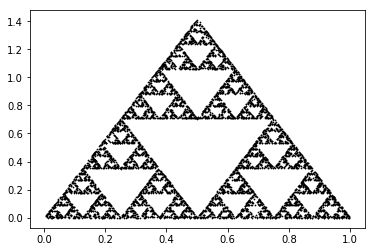

In [14]:
scatter(qx,qy,s=0.5,color='black')
show()

This resulting framework is called the Sierpinski gasket, an attractor for the dynamics of the entire plane. 

The second geometric game goes as follow:
1. Start with a triangle
2. Remove a triangle from its center in such a way that three identical triangles remain
3. Iterate ad infinitum for all triangles remaining.

If we cut in half an edge of the triangle of length L, its mass is reduced by a factor of 3. After t steps, we have

$$M_t = 3^{-t}M, \quad L_t = 2^{-t}L$$

This leads to 

$$D = \lim_{t \to \infty} \frac{ln M_t}{ln L_t} = \lim_{t \to \infty} \frac{(-t)ln 3 + ln M_t}{(-t)ln 2 + ln L_t} = \frac{ln 2}{ln 3}$$

The Sierpinski gasket has a fractional dimension $D = 1.58...$. It does not fill an area but is more than a line. Its density $\rho = M/L^2$ is zero.